In [55]:
# Momoh Maryam Shuaibu
# vug/csc/22/7327
#STEP ONE:
#I selected Telco Customer Churn dataset from Kaggle and has approximately 7000 records
#It has features that allow for classification

In [ ]:
#STEP 2: IMPORT AND INSPECT THE DATA
# Import the pandas library for handling tabular data (like Excel in Python)
import pandas as pd

In [5]:
# Load the dataset from the file into a DataFrame.
df = pd.read_csv("C:/Users/user/Desktop/WA_Fn-UseC_-Telco-Customer-Churn(1).csv")

In [6]:
# Check the shape of the dataset: (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [8]:
# Show the first 5 rows of the dataset
df.head()
# Gives information about each column: name, type, non-null count
df.info()
# Gives descriptive statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#STEP THREE: CLEAN AND PREPROCESS THE DATA
# Check how many missing values exist in each column
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Convert 'TotalCharges' to numeric, since it's mistakenly treated as text due to blank values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
# Now drop rows where TotalCharges couldn't be converted and became NaN
df = df.dropna()

In [12]:
# Check for duplicate rows 
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [13]:
# Drop the customerID column — it's just a unique identifier, doesn't help prediction
df = df.drop('customerID', axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Churn' column into 0 and 1 manually (target column)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes = 1, No = 0
#This converts the Yes/No target column into 1s and 0s — essential for classification.

In [15]:
# Convert all other categorical variables to dummy/indicator variables
df = pd.get_dummies(df)

In [16]:
# Goal: Put all numerical values on the same scale to prevent dominance.
from sklearn.preprocessing import StandardScaler

# Choose the numeric columns to scale
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [18]:
# we dont have any datetime columns in this dataset. If we had columns like “signup_date”, we’d use:

# df['signup_date'] = pd.to_datetime(df['signup_date'])


In [19]:
#STEP FOUR: CONDUCT BASIC EDA
# Descriptive stats for all numeric columns
df.describe()
#This gives us the min, max, mean, std, quartiles — everything we need to sniff out outliers and weird distributions.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,-1.214741e-16,9.652878e-17,-1.172113e-16,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Goal: See if our target variable ('Churn') is balanced or skewed.
# Count of churned vs not churned customers
print(df['Churn'].value_counts())

# Percentage of churned vs non-churned
print(df['Churn'].value_counts(normalize=True) * 100)

0    5163
1    1869
Name: Churn, dtype: int64
0    73.421502
1    26.578498
Name: Churn, dtype: float64


In [21]:
#Goal: Analyze how different categories affect churn rate.
#grouping by category columns and seeing their effect on churn tells you which features really matter.
# Churn rate by gender
print(df.groupby('gender_Female')['Churn'].mean())

# Churn rate by contract type
contract_cols = [col for col in df.columns if 'Contract_' in col]
for col in contract_cols:
    churn_rate = df.groupby(col)['Churn'].mean()
    print(f"Churn rate for {col}:\n{churn_rate}\n")

gender_Female
0    0.262046
1    0.269595
Name: Churn, dtype: float64
Churn rate for Contract_Month-to-month:
Contract_Month-to-month
0    0.067786
1    0.427097
Name: Churn, dtype: float64

Churn rate for Contract_One year:
Contract_One year
0    0.306295
1    0.112772
Name: Churn, dtype: float64

Churn rate for Contract_Two year:
Contract_Two year
0    0.340565
1    0.028487
Name: Churn, dtype: float64



In [22]:
#Goal: See which features are most closely related to churn.
# Correlation of all features with Churn
correlations = df.corr()['Churn'].sort_values(ascending=False)
print(correlations.head(10))   # Top positive correlations
print(correlations.tail(10))   # Top negative correlations


Churn                             1.000000
Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
Name: Churn, dtype: float64
TotalCharges                           -0.199484
DeviceProtection_No internet service   -0.227578
StreamingMovies_No internet service    -0.227578
InternetService_No                     -0.227578
OnlineSecurity_No internet service     -0.227578
StreamingTV_No internet service        -0.227578
TechSupport_No internet service        -0.227578
OnlineBackup_No internet service       -0.227578
Contract_Two year                      -0.301552
tenure                                 -0.354049
Name: Churn, dtype: float64


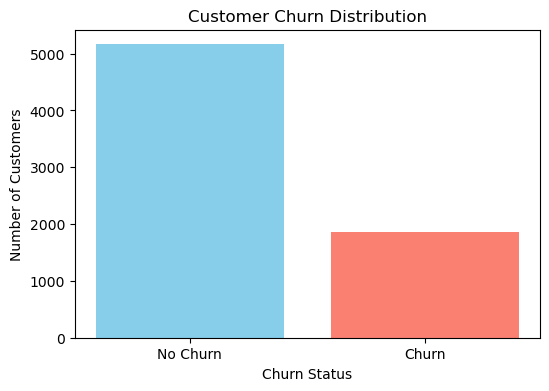

In [23]:
#STEP FIVE: VISUALISE THE DATA
#Chart 1 — [Matplotlib] Bar Chart: Churn Distribution
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(['No Churn', 'Churn'], churn_counts, color=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

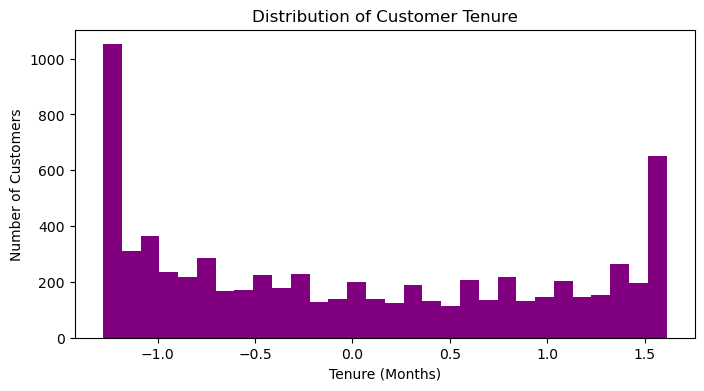

In [24]:
#Chart 2 — [Matplotlib] Histogram: Tenure Distribution
plt.figure(figsize=(8,4))
plt.hist(df['tenure'], bins=30, color='purple')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

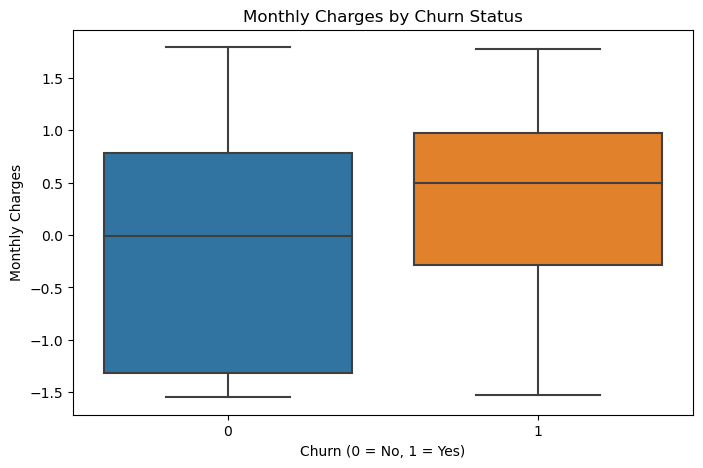

In [25]:
#Chart 3 — [Seaborn] Boxplot: Monthly Charges vs Churn
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

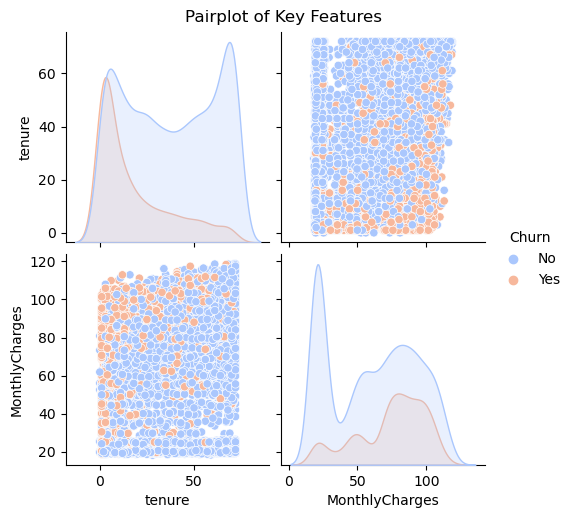

In [46]:
#Chart 4 — [Seaborn] Heatmap: Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# If the columns are fine, proceed with the pairplot
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')

# Add a title using plt.suptitle
plt.suptitle('Pairplot of Key Features', y=1.02)  # y=1.02 places the title slightly above the plot
plt.show()


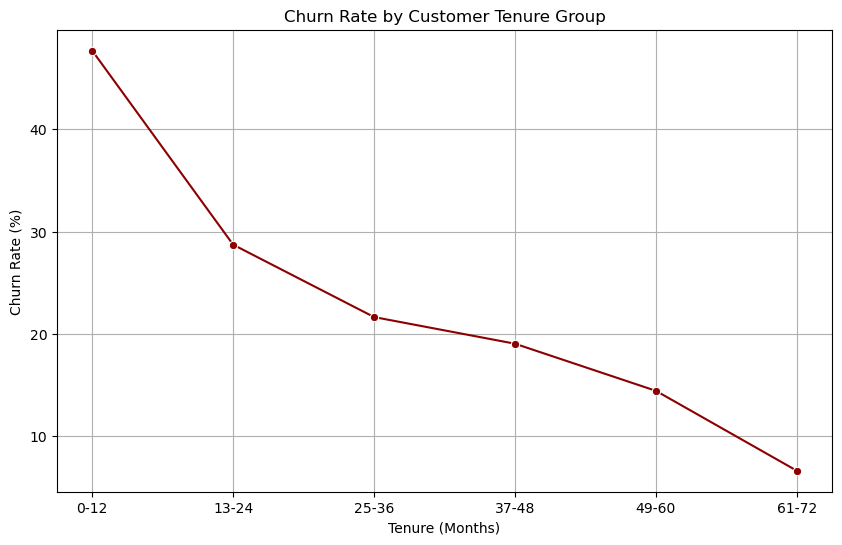

In [38]:
#Chart 5 — [My choice] Line Plot of Churn Rate by Tenure Buckets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load original data to get access to clean 'Churn' and 'tenure'
df_raw = pd.read_csv("C:/Users/user/Desktop/WA_Fn-UseC_-Telco-Customer-Churn(1).csv")

# Create tenure groups (e.g., 0–12 months, 13–24, etc.)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df_raw['tenure_group'] = pd.cut(df_raw['tenure'], bins=bins, labels=labels, right=True)

# Calculate churn rate per group
churn_by_tenure = df_raw.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_tenure['Churn Rate'] = churn_by_tenure['Yes'] * 100  # convert to %

# Plot churn rate across tenure groups
plt.figure(figsize=(10,6))
sns.lineplot(data=churn_by_tenure, x=churn_by_tenure.index, y='Churn Rate', marker='o', color='darkred')
plt.title("Churn Rate by Customer Tenure Group")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.show()
# my insight:
#Churn rate is highest among new customers (0–12 months), then drops sharply with tenure.
# The longer a customer stays, the less likely they are to churn. 
#This suggests that getting customers past the initial service period is key to improving lifetime value.

C:\Users\user\AppData\Local\Temp\ipykernel_5980\4081335507.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


Accuracy: 0.7894
Confusion Matrix:
[[1408  131]
 [ 314  260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



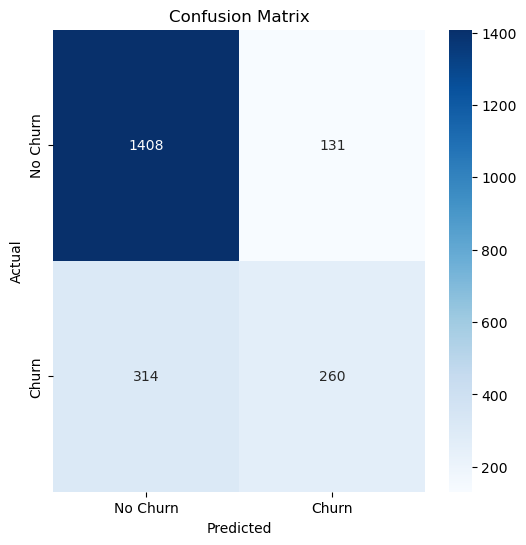

In [53]:
#STEP 6: APPLY MACHINE LEARNING ANALYSIS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values
df = df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])  # Drop rows with missing values

# Ensure all columns are numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optionally fill any remaining NaNs
df = df.fillna(df.median())

# Encode target 'Churn' (if categorical)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# Split the data into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
#I selected Logistic Regression as the model for this classification task:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
#Confusion Matrix (to show true positives, false positives, etc.):
conf_matrix = confusion_matrix(y_test, y_pred)
#Precision, Recall, F1-Score (included in the classification report):
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
